In [2]:
#imports
import pandas as pd
import seaborn as sns
import seaborn
import matplotlib.pyplot as plt
import matplotlib
import textwrap
import plotly.express as px
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from matplotlib.pyplot import figure
import numpy as np
import folium
import squarify
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx
import plotly.graph_objects as go
from folium.plugins import MarkerCluster
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
!pip install pmdarima --quiet
import pmdarima as pm
from sklearn import metrics
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def rmse(y_true, y_pred):
    return np.sqrt(metrics.mean_squared_error(y_true, y_pred))

Choose hyperparams through grid search or AIC: 

In [2]:
#import t_stats, toronto_all_stats and exo stats 

In [4]:
# Import DataFrame from CSV
t_stats = pd.read_csv('t_stats.csv')

t_stats


,Month,Median Price
0,2013-01-01,413500
1,2013-02-01,434000
2,2013-03-01,441000
3,2013-04-01,453500
4,2013-05-01,478500
5,2013-06-01,455000
6,2013-07-01,439000
7,2013-08-01,423000
8,2013-09-01,451510
9,2013-10-01,467000


In [3]:
x_stats = pd.read_csv('x_stats.csv')

x_stats

,CPI_Can,New_Housing_Price_Index,Inflation,GDP,ON_Unemployment_Rate,Bank_Rate,CAN_Mort_Lending_Rate5yr,Mortgage_Var_Rate,Mortgage_Fixed_Rate_5yr,TO_Units_Absorbed,Bond_1-3yr_Avg
0,121.3,91.8,1.3,1729586.0,7.7,1.25,4.14,3.57,3.00,942.0,1.16
1,122.7,91.9,1.5,1734805.0,7.5,1.25,4.11,3.52,2.98,900.0,1.12
2,122.9,92.0,1.5,1740839.0,7.6,1.25,4.02,3.51,2.99,982.0,1.01
3,122.7,92.2,1.2,1743937.0,7.6,1.25,4.02,3.52,2.99,966.0,1.00
4,123.0,92.4,1.2,1748724.0,7.5,1.25,4.02,3.50,2.96,930.0,1.04
5,123.0,92.5,1.2,1742396.0,7.6,1.25,4.00,3.49,2.93,996.0,1.18
6,123.1,92.7,1.3,1752447.0,7.7,1.25,4.08,3.31,3.00,1085.0,1.17
7,123.1,92.8,1.2,1760130.0,7.7,1.25,4.14,3.13,3.11,1221.0,1.23
8,123.3,92.8,1.3,1766098.0,7.5,1.25,4.33,3.03,3.20,915.0,1.27
9,123.0,92.9,1.2,1775606.0,7.6,1.25,4.40,2.95,3.27,926.0,1.15


# START

# 2022

In [5]:
target_trainY = t_stats['Median Price'][:-17]
exog_trainY = x_stats[:-17]

In [6]:
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX
 
def optimize_SARIMA(endog: Union[pd.Series, list], order_list: list, d: 
 int, D: int, s: int) -> pd.DataFrame:
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(
                endog, 
                order=(order[0], d, order[1]),
                seasonal_order=(order[2], D, order[3], s),
                simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, aic])
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q,P,Q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [7]:
from itertools import product
 
ps = range(0, 13, 1)
qs = range(0, 13, 1)    
Ps = [0]
Qs = [0]    

d = 1
D = 0
s = 12
 
ARIMA_order_list = list(product(ps, qs, Ps, Qs))

In [8]:
ARIMA_result_df = optimize_SARIMA(target_trainY, ARIMA_order_list, d, D, s)
ARIMA_result_df

/var/folders/5t/6l7y1cln3zb54s7r50bzxx080000gn/T/ipykernel_65389/2473469477.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/169 [00:00<?, ?it/s]

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/st

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/st

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-pa

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaco

,"(p,q,P,Q)",AIC
0,"(7, 8, 0, 0)",2525.104196
1,"(5, 2, 0, 0)",2526.139053
2,"(8, 7, 0, 0)",2527.188250
3,"(6, 2, 0, 0)",2527.508213
4,"(7, 9, 0, 0)",2528.170494
5,"(9, 10, 0, 0)",2528.414568
6,"(7, 10, 0, 0)",2528.756733
7,"(8, 10, 0, 0)",2528.958664
8,"(2, 6, 0, 0)",2529.039268
9,"(9, 11, 0, 0)",2529.149140


In [9]:
ARIMA_model1 = SARIMAX(target_trainY, order=(7,1,8), simple_differencing=False)
ARIMA_model1_fit = ARIMA_model1.fit(disp=False)

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [10]:
test1 = t_stats.iloc[108:120]
test1

,Month,Median Price
108,2022-01-01,827500
109,2022-02-01,932000
110,2022-03-01,979000
111,2022-04-01,980000
112,2022-05-01,980000
113,2022-06-01,930000
114,2022-07-01,850000
115,2022-08-01,820000
116,2022-09-01,859000
117,2022-10-01,887500


In [11]:
test1['naive_seasonal'] = t_stats['Median Price'].iloc[96:108].values
test1

/var/folders/5t/6l7y1cln3zb54s7r50bzxx080000gn/T/ipykernel_65389/1534541494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['naive_seasonal'] = t_stats['Median Price'].iloc[96:108].values


,Month,Median Price,naive_seasonal
108,2022-01-01,827500,672000
109,2022-02-01,932000,765000
110,2022-03-01,979000,860000
111,2022-04-01,980000,875000
112,2022-05-01,980000,890000
113,2022-06-01,930000,867000
114,2022-07-01,850000,817700
115,2022-08-01,820000,785000
116,2022-09-01,859000,860000
117,2022-10-01,887500,880900


In [12]:
ARIMA_pred1 = ARIMA_model1_fit.get_prediction(108,119).predicted_mean
test1['ARIMA_pred1'] = ARIMA_pred1

/var/folders/5t/6l7y1cln3zb54s7r50bzxx080000gn/T/ipykernel_65389/1069736889.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['ARIMA_pred1'] = ARIMA_pred1


In [13]:
test1

,Month,Median Price,naive_seasonal,ARIMA_pred1
108,2022-01-01,827500,672000,787608.273210
109,2022-02-01,932000,765000,817383.132332
110,2022-03-01,979000,860000,832420.645820
111,2022-04-01,980000,875000,822242.481703
112,2022-05-01,980000,890000,830512.836892
113,2022-06-01,930000,867000,825808.100502
114,2022-07-01,850000,817700,816277.592424
115,2022-08-01,820000,785000,799782.750053
116,2022-09-01,859000,860000,818653.745409
117,2022-10-01,887500,880900,858550.234196


In [14]:
#test with d=1, and D=1 and d=1, and D=0
ps = range(0, 4, 1)
qs = range(0, 4, 1)
Ps = range(0, 4, 1)
Qs = range(0, 4, 1)
 
SARIMA_order_list = list(product(ps, qs, Ps, Qs))
 
d = 1
D = 0
s = 12
 
SARIMA_result_df1 = optimize_SARIMA(target_trainY, SARIMA_order_list, d, D, s)
SARIMA_result_df1

/var/folders/5t/6l7y1cln3zb54s7r50bzxx080000gn/T/ipykernel_65389/2473469477.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/256 [00:00<?, ?it/s]

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to esti

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting pa

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sari

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting sea

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA param

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA param

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,"(p,q,P,Q)",AIC
0,"(3, 0, 1, 1)",2510.704583
1,"(0, 3, 1, 1)",2511.036432
2,"(2, 1, 1, 1)",2511.049245
3,"(3, 0, 1, 2)",2512.267354
4,"(3, 0, 2, 1)",2512.312612
5,"(3, 1, 1, 1)",2512.632180
6,"(0, 3, 1, 2)",2512.636521
7,"(0, 3, 2, 1)",2512.677218
8,"(2, 0, 1, 1)",2512.741583
9,"(2, 1, 1, 2)",2512.745294


In [13]:
# (p,q,P,Q)	AIC
# 0	(3, 0, 1, 1)	2510.704583
# 1	(0, 3, 1, 1)	2511.036432
# 2	(2, 1, 1, 1)	2511.049245
# 3	(3, 0, 2, 1)	2512.267354

In [29]:
SARIMA_model1 = SARIMAX(target_trainY, order=(3,1,0), seasonal_order=(1,0,1,12), simple_differencing=False)
SARIMA_model1_fit = SARIMA_model1.fit(disp=False)

SARIMA_model2 = SARIMAX(target_trainY, order=(0,1,3), seasonal_order=(1,0,1,12), simple_differencing=False)
SARIMA_model2_fit = SARIMA_model2.fit(disp=False)

SARIMA_model3 = SARIMAX(target_trainY, order=(2,1,1), seasonal_order=(1,0,1,12), simple_differencing=False)
SARIMA_model3_fit = SARIMA_model3.fit(disp=False)

SARIMA_model4 = SARIMAX(target_trainY, order=(3,1,0), seasonal_order=(2,0,1,12), simple_differencing=False)
SARIMA_model4_fit = SARIMA_model4.fit(disp=False)

In [30]:
#SARIMA_model1_fit.plot_diagnostics(figsize=(10,10));

In [31]:
# from statsmodels.stats.diagnostic import acorr_ljungbox
 
# residuals = SARIMA_model1_fit.resid

In [32]:
test1

,Month,Median Price,naive_seasonal,ARIMA_pred1,SARIMA_pred1,SARIMA_pred2,SARIMA_pred3,SARIMA_pred4
108,2022-01-01,827500,672000,787608.273210,803969.446368,805620.514244,804539.152173,800566.783734
109,2022-02-01,932000,765000,817383.132332,839637.306463,840625.202045,838325.998098,820950.099787
110,2022-03-01,979000,860000,832420.645820,861417.223314,860977.946350,860020.245683,837110.008378
111,2022-04-01,980000,875000,822242.481703,865061.057140,865099.110295,864705.737406,839346.937497
112,2022-05-01,980000,890000,830512.836892,872365.660327,873206.886878,872836.230563,848512.023690
113,2022-06-01,930000,867000,825808.100502,868534.066125,869599.087978,869074.226922,852414.208190
114,2022-07-01,850000,817700,816277.592424,851920.194275,852860.462811,852112.482163,847057.039433
115,2022-08-01,820000,785000,799782.750053,844251.846544,845017.806057,844180.791969,839005.141844
116,2022-09-01,859000,860000,818653.745409,869546.803134,870226.679659,869531.142470,862479.461539
117,2022-10-01,887500,880900,858550.234196,874521.684031,875180.137699,874629.016224,863686.005666


In [33]:
SARIMA_pred1 = SARIMA_model1_fit.get_prediction(108,119).predicted_mean
 
test1['SARIMA_pred1'] = SARIMA_pred1

SARIMA_pred2 = SARIMA_model2_fit.get_prediction(108,119).predicted_mean
 
test1['SARIMA_pred2'] = SARIMA_pred2

SARIMA_pred3 = SARIMA_model3_fit.get_prediction(108,119).predicted_mean
 
test1['SARIMA_pred3'] = SARIMA_pred3

SARIMA_pred4 = SARIMA_model4_fit.get_prediction(108,119).predicted_mean
 
test1['SARIMA_pred4'] = SARIMA_pred4

/var/folders/5t/6l7y1cln3zb54s7r50bzxx080000gn/T/ipykernel_65389/2922201168.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['SARIMA_pred1'] = SARIMA_pred1
/var/folders/5t/6l7y1cln3zb54s7r50bzxx080000gn/T/ipykernel_65389/2922201168.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['SARIMA_pred2'] = SARIMA_pred2
/var/folders/5t/6l7y1cln3zb54s7r50bzxx080000gn/T/ipykernel_65389/2922201168.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [34]:
test1

,Month,Median Price,naive_seasonal,ARIMA_pred1,SARIMA_pred1,SARIMA_pred2,SARIMA_pred3,SARIMA_pred4
108,2022-01-01,827500,672000,787608.273210,803969.446368,805620.514244,804539.152173,802807.589244
109,2022-02-01,932000,765000,817383.132332,839637.306463,840625.202045,838325.998098,837886.288073
110,2022-03-01,979000,860000,832420.645820,861417.223314,860977.946350,860020.245683,857319.940933
111,2022-04-01,980000,875000,822242.481703,865061.057140,865099.110295,864705.737406,858693.952185
112,2022-05-01,980000,890000,830512.836892,872365.660327,873206.886878,872836.230563,866851.074313
113,2022-06-01,930000,867000,825808.100502,868534.066125,869599.087978,869074.226922,864908.852528
114,2022-07-01,850000,817700,816277.592424,851920.194275,852860.462811,852112.482163,849921.822586
115,2022-08-01,820000,785000,799782.750053,844251.846544,845017.806057,844180.791969,843451.172006
116,2022-09-01,859000,860000,818653.745409,869546.803134,870226.679659,869531.142470,867041.760308
117,2022-10-01,887500,880900,858550.234196,874521.684031,875180.137699,874629.016224,871426.513505


In [35]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
 
mape_naive_seasonal = mape(test1['Median Price'], test1['naive_seasonal'])
mape_ARIMA1 = mape(test1['Median Price'], test1['ARIMA_pred1'])
mape_SARIMA1 = mape(test1['Median Price'], test1['SARIMA_pred1'])
mape_SARIMA2 = mape(test1['Median Price'], test1['SARIMA_pred2'])
mape_SARIMA3 = mape(test1['Median Price'], test1['SARIMA_pred3'])
mape_SARIMA4 = mape(test1['Median Price'], test1['SARIMA_pred4'])

In [36]:
print("MAPE NAIVE: ", mape_naive_seasonal)
print("MAPE ARIMA1: ", mape_ARIMA1)
print("MAPE SARIMA1: ", mape_SARIMA1)
print("MAPE SARIMA2: ", mape_SARIMA2)
print("MAPE SARIMA3: ", mape_SARIMA3)
print("MAPE SARIMA4: ", mape_SARIMA4)

MAPE NAIVE:  7.228835773246243
MAPE ARIMA1:  7.5622974891157115
MAPE SARIMA1:  5.372677119210383
MAPE SARIMA2:  5.365685732210497
MAPE SARIMA3:  5.382651190319045
MAPE SARIMA4:  5.4692387538386535


In [37]:
# Create a dictionary with the MAPE and RMSE values
data = {'MAPE': [mape_naive_seasonal, mape_ARIMA1, mape_SARIMA1, mape_SARIMA2, mape_SARIMA3, mape_SARIMA4]}
# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Set the index of the DataFrame to be the MAPE and RMSE titles
df.index = ['Naive - 2021' , 'ARIMA(7,1,8)', 'SARIMA(3,1,0)(1,0,1)', 'SARIMA(0,1,3)(1,0,1)', 'SARIMA(2,1,1)(1,0,1)', 
           'SARIMA(3,1,0)(2,0,1)']

# (p,q,P,Q)	AIC
# 0	(3, 0, 1, 1)	2510.704583
# 1	(0, 3, 1, 1)	2511.036432
# 2	(2, 1, 1, 1)	2511.049245
# 3	(3, 0, 2, 1)	2512.267354

# Display the DataFrame
df

,MAPE
Naive - 2021,7.228836
"ARIMA(7,1,8)",7.562297
"SARIMA(3,1,0)(1,0,1)",5.372677
"SARIMA(0,1,3)(1,0,1)",5.365686
"SARIMA(2,1,1)(1,0,1)",5.382651
"SARIMA(3,1,0)(2,0,1)",5.469239


In [38]:
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX
 
def optimize_SARIMAX(endog: Union[pd.Series, list], exog: Union[pd.Series, 
 list], order_list: list, d: int, D: int, s: int) -> pd.DataFrame:
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(
                endog,
                exog,
                order=(order[0], d, order[1]),
                seasonal_order=(order[2], D, order[3], s),
                simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q,P,Q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', 
 ascending=True).reset_index(drop=True)
    
    return result_df

In [39]:
p = range(0, 4, 1)
d = 1
q = range(0, 4, 1)
P = range(0, 4, 1)
D = 0
Q = range(0, 4, 1)
s = 12
 
parameters = product(p, q, P, Q)
parameters_list = list(parameters)

In [40]:
result_df = optimize_SARIMAX(target_trainY, exog_trainY, parameters_list, d, D, s)
result_df

/var/folders/5t/6l7y1cln3zb54s7r50bzxx080000gn/T/ipykernel_65389/4118411627.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/256 [00:00<?, ?it/s]

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/user/opt/anaconda3/lib/python3.9/s

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will 

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will 

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelih

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/User

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,"(p,q,P,Q)",AIC
0,"(2, 2, 0, 0)",2505.048879
1,"(2, 2, 0, 2)",2508.011690
2,"(3, 3, 1, 0)",2510.519035
3,"(3, 3, 0, 0)",2511.035963
4,"(2, 3, 0, 1)",2511.388188
5,"(2, 2, 0, 1)",2511.759563
6,"(3, 3, 0, 1)",2512.321715
7,"(3, 3, 0, 3)",2513.179943
8,"(3, 3, 1, 1)",2514.882873
9,"(3, 3, 1, 3)",2515.472258


In [41]:
def recursive_forecast(parList, endog: Union[pd.Series, list], exog: Union[pd.Series, list], train_len: int, horizon: int, window: int, method: str) -> list:
    
    p = parList[0]
    q = parList[1]
    d = parList[2]
    P = parList[3]
    Q = parList[4]
    D = parList[5]
    s = parList[6]
    
    total_len = train_len + horizon

    if method == 'last':
        pred_last_value = []
        
        for i in range(train_len, total_len, window):
            last_value = endog[:i].iloc[-1]
            pred_last_value.extend(last_value for _ in range(window))
            
        return pred_last_value
    
    elif method == 'SARIMAX':
        pred_SARIMAX = []
        
        for i in range(train_len, total_len, window):
            model = SARIMAX(endog[:i], exog[:i], order=(p,d,q), seasonal_order=(P,D,Q,s), simple_differencing=False)
            res = model.fit(disp=False)
            predictions = res.get_prediction(exog=exog)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_SARIMAX.extend(oos_pred)
            
        return pred_SARIMAX

In [47]:
test1

,Month,Median Price,naive_seasonal,ARIMA_pred1,SARIMA_pred1,SARIMA_pred2,SARIMA_pred3,SARIMA_pred4
108,2022-01-01,827500,672000,787608.273210,803969.446368,805620.514244,804539.152173,802807.589244
109,2022-02-01,932000,765000,817383.132332,839637.306463,840625.202045,838325.998098,837886.288073
110,2022-03-01,979000,860000,832420.645820,861417.223314,860977.946350,860020.245683,857319.940933
111,2022-04-01,980000,875000,822242.481703,865061.057140,865099.110295,864705.737406,858693.952185
112,2022-05-01,980000,890000,830512.836892,872365.660327,873206.886878,872836.230563,866851.074313
113,2022-06-01,930000,867000,825808.100502,868534.066125,869599.087978,869074.226922,864908.852528
114,2022-07-01,850000,817700,816277.592424,851920.194275,852860.462811,852112.482163,849921.822586
115,2022-08-01,820000,785000,799782.750053,844251.846544,845017.806057,844180.791969,843451.172006
116,2022-09-01,859000,860000,818653.745409,869546.803134,870226.679659,869531.142470,867041.760308
117,2022-10-01,887500,880900,858550.234196,874521.684031,875180.137699,874629.016224,871426.513505


In [48]:
target_testY = t_stats['Median Price'][108:120]
 
pred_df_Y = pd.DataFrame({'actual': target_testY})
 
TRAIN_LEN = len(target_trainY)
HORIZON = len(target_testY)
WINDOW = 1

parList = [0,0,0,0,0,0,0]
 
pred_last_value_Y = recursive_forecast(parList, t_stats['Median Price'], x_stats, TRAIN_LEN, HORIZON, 
 WINDOW, 'last')

# p = parList[0]
# q = parList[1]
# d = parList[2]
# P = parList[3]
# Q = parList[4]
# D = parList[5]
# s = parList[6]


# (p,q,P,Q)	AIC
# 0	(2, 2, 0, 0)	2505.048879
# 1	(2, 2, 0, 2)	2508.011690
# 2	(3, 3, 1, 0)	2510.519035
# 3	(3, 3, 0, 0)	2511.035963


parList = [2,2,1,0,0,0,12]

pred_SARIMAX_Y1 = recursive_forecast(parList, t_stats['Median Price'], x_stats, TRAIN_LEN, HORIZON, WINDOW, 
 'SARIMAX')

parList = [2,2,1,0,2,0,12]

pred_SARIMAX_Y2 = recursive_forecast(parList, t_stats['Median Price'], x_stats, TRAIN_LEN, HORIZON, WINDOW, 
 'SARIMAX')

parList = [3,3,1,0,1,0,12]

pred_SARIMAX_Y3 = recursive_forecast(parList, t_stats['Median Price'], x_stats, TRAIN_LEN, HORIZON, WINDOW, 
 'SARIMAX')

parList = [2,3,1,0,1,0,12]
pred_SARIMAX_Y4 = recursive_forecast(parList, t_stats['Median Price'], x_stats, TRAIN_LEN, HORIZON, WINDOW, 'SARIMAX')


pred_df_Y['pred_last_value_Y'] = pred_last_value_Y
pred_df_Y['pred_SARIMAX_Y1'] = pred_SARIMAX_Y1
pred_df_Y['pred_SARIMAX_Y2'] = pred_SARIMAX_Y2
pred_df_Y['pred_SARIMAX_Y3'] = pred_SARIMAX_Y3
pred_df_Y['pred_SARIMAX_Y4'] = pred_SARIMAX_Y4
pred_df_Y['pred_SARIMA_Y'] = SARIMA_pred2
pred_df_Y['pred_ARIMA_Y'] = ARIMA_pred1

pred_df_Y

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/st

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaco

,actual,pred_last_value_Y,pred_SARIMAX_Y1,pred_SARIMAX_Y2,pred_SARIMAX_Y3,pred_SARIMAX_Y4,pred_SARIMA_Y,pred_ARIMA_Y
108,827500,802000,8.110413e+05,8.106110e+05,8.129411e+05,8.117494e+05,805620.514244,787608.273210
109,932000,827500,8.031980e+05,8.168738e+05,8.076751e+05,8.073197e+05,840625.202045,817383.132332
110,979000,932000,9.088478e+05,9.084564e+05,9.045912e+05,9.060159e+05,860977.946350,832420.645820
111,980000,979000,1.002903e+06,1.000981e+06,9.962844e+05,1.001830e+06,865099.110295,822242.481703
112,980000,980000,9.827684e+05,9.841195e+05,9.844846e+05,9.840543e+05,873206.886878,830512.836892
113,930000,980000,9.991116e+05,9.929012e+05,1.003472e+06,1.003855e+06,869599.087978,825808.100502
114,850000,930000,9.392952e+05,9.385846e+05,9.424990e+05,9.408754e+05,852860.462811,816277.592424
115,820000,850000,8.378396e+05,8.399251e+05,8.398236e+05,8.445047e+05,845017.806057,799782.750053
116,859000,820000,8.603779e+05,8.596693e+05,8.576561e+05,8.586613e+05,870226.679659,818653.745409
117,887500,859000,8.350524e+05,8.359968e+05,8.320083e+05,8.344407e+05,875180.137699,858550.234196


In [65]:
pred_df_Y['pred_naive_seasonal'] = t_stats['Median Price'].iloc[96:108].values
pred_df_Y['pred_lstm_st'] = [860519.84381676, 872281.59925342, 879955.0986886 , 884050.04036427,
       889448.41837883, 895714.04314041, 903313.49366903, 911462.65518665,
       918811.3591671 , 920328.1968236 , 920625.43919682, 922170.74161768]  

pred_df_Y['pred_lstm_mt'] = [787123.76970053, 895404.78006005, 865231.65711761, 870227.74663568,
       823994.21611428, 863766.17759466, 840149.91143346, 897761.04125381,
       825106.73931241, 901123.86783957, 893567.671597  , 899770.59283853 ]

pred_df_Y['pred_lstm_st1'] = [873615.28995633, 888939.02403116, 898252.77596712, 902030.31694889,
       907128.14351916, 913319.14535165, 921832.84494281, 932296.33024335,
       942782.97904134, 945645.49434185, 946484.10749435, 949050.22457242]  

pred_df_Y['pred_lstm_mt1'] = [912703.08411121, 872868.99313331, 852646.55077457, 804472.92539477,
       939069.82988119, 885985.50927639, 856229.59941626, 909245.51004171,
       935702.24228501, 943361.15479469, 935296.23952508, 957726.74396634]

pred_df_Y

,actual,pred_last_value_Y,pred_SARIMAX_Y1,pred_SARIMAX_Y2,pred_SARIMAX_Y3,pred_SARIMAX_Y4,pred_SARIMA_Y,pred_ARIMA_Y,pred_naive_seasonal,pred_lstm_st,pred_lstm_mt,pred_lstm_st1,pred_lstm_mt1
108,827500,802000,8.110413e+05,8.106110e+05,8.129411e+05,8.117494e+05,805620.514244,787608.273210,672000,860519.843817,787123.769701,873615.289956,912703.084111
109,932000,827500,8.031980e+05,8.168738e+05,8.076751e+05,8.073197e+05,840625.202045,817383.132332,765000,872281.599253,895404.780060,888939.024031,872868.993133
110,979000,932000,9.088478e+05,9.084564e+05,9.045912e+05,9.060159e+05,860977.946350,832420.645820,860000,879955.098689,865231.657118,898252.775967,852646.550775
111,980000,979000,1.002903e+06,1.000981e+06,9.962844e+05,1.001830e+06,865099.110295,822242.481703,875000,884050.040364,870227.746636,902030.316949,804472.925395
112,980000,980000,9.827684e+05,9.841195e+05,9.844846e+05,9.840543e+05,873206.886878,830512.836892,890000,889448.418379,823994.216114,907128.143519,939069.829881
113,930000,980000,9.991116e+05,9.929012e+05,1.003472e+06,1.003855e+06,869599.087978,825808.100502,867000,895714.043140,863766.177595,913319.145352,885985.509276
114,850000,930000,9.392952e+05,9.385846e+05,9.424990e+05,9.408754e+05,852860.462811,816277.592424,817700,903313.493669,840149.911433,921832.844943,856229.599416
115,820000,850000,8.378396e+05,8.399251e+05,8.398236e+05,8.445047e+05,845017.806057,799782.750053,785000,911462.655187,897761.041254,932296.330243,909245.510042
116,859000,820000,8.603779e+05,8.596693e+05,8.576561e+05,8.586613e+05,870226.679659,818653.745409,860000,918811.359167,825106.739312,942782.979041,935702.242285
117,887500,859000,8.350524e+05,8.359968e+05,8.320083e+05,8.344407e+05,875180.137699,858550.234196,880900,920328.196824,901123.867840,945645.494342,943361.154795


In [66]:
mape_last_Y = mape(pred_df_Y.actual, pred_df_Y.pred_last_value_Y)
mape_seasonal_Y = mape(pred_df_Y.actual, pred_df_Y.pred_naive_seasonal)
mape_LSTM_ST_Y = mape(pred_df_Y.actual, pred_df_Y.pred_lstm_st)
mape_LSTM_MT_Y = mape(pred_df_Y.actual, pred_df_Y.pred_lstm_mt)
mape_LSTM_ST1_Y = mape(pred_df_Y.actual, pred_df_Y.pred_lstm_st1)
mape_LSTM_MT1_Y = mape(pred_df_Y.actual, pred_df_Y.pred_lstm_mt1)
mape_SARIMAX_Y1 = mape(pred_df_Y.actual, pred_df_Y.pred_SARIMAX_Y1)
mape_SARIMAX_Y2 = mape(pred_df_Y.actual, pred_df_Y.pred_SARIMAX_Y2)
mape_SARIMAX_Y3 = mape(pred_df_Y.actual, pred_df_Y.pred_SARIMAX_Y3)
mape_SARIMAX_Y4 = mape(pred_df_Y.actual, pred_df_Y.pred_SARIMAX_Y4)
mape_SARIMA_Y = mape(pred_df_Y.actual, pred_df_Y.pred_SARIMA_Y)
mape_ARIMA_Y = mape(pred_df_Y.actual, pred_df_Y.pred_ARIMA_Y)

rmse_last_Y = rmse(pred_df_Y.actual, pred_df_Y.pred_last_value_Y)
rmse_seasonal_Y = rmse(pred_df_Y.actual, pred_df_Y.pred_naive_seasonal)
rmse_LSTM_ST_Y = rmse(pred_df_Y.actual, pred_df_Y.pred_lstm_st)
rmse_LSTM_MT_Y = rmse(pred_df_Y.actual, pred_df_Y.pred_lstm_mt)
rmse_LSTM_ST1_Y = rmse(pred_df_Y.actual, pred_df_Y.pred_lstm_st1)
rmse_LSTM_MT1_Y = rmse(pred_df_Y.actual, pred_df_Y.pred_lstm_mt1)
rmse_SARIMAX_Y1 = rmse(pred_df_Y.actual, pred_df_Y.pred_SARIMAX_Y1)
rmse_SARIMAX_Y2 = rmse(pred_df_Y.actual, pred_df_Y.pred_SARIMAX_Y2)
rmse_SARIMAX_Y3 = rmse(pred_df_Y.actual, pred_df_Y.pred_SARIMAX_Y3)
rmse_SARIMAX_Y4 = rmse(pred_df_Y.actual, pred_df_Y.pred_SARIMAX_Y4)
rmse_SARIMA_Y = rmse(pred_df_Y.actual, pred_df_Y.pred_SARIMA_Y)
rmse_ARIMA_Y = rmse(pred_df_Y.actual, pred_df_Y.pred_ARIMA_Y)

print("MAPE LAST_Y: ", mape_last_Y)
print("MAPE SEASONAL_Y: ", mape_seasonal_Y)
print("MAPE LSTM_ST_Y: ", mape_LSTM_ST_Y)
print("MAPE LSTM_MT_Y: ", mape_LSTM_MT_Y)
print("MAPE LSTM_ST1_Y: ", mape_LSTM_ST1_Y)
print("MAPE LSTM_MT1_Y: ", mape_LSTM_MT1_Y)
print("MAPE ARIMA_Y: ", mape_ARIMA_Y)
print("MAPE SARIMA_Y: ", mape_SARIMA_Y)
print("MAPE SARIMAX_Y1: ", mape_SARIMAX_Y1)
print("MAPE SARIMAX_Y2: ", mape_SARIMAX_Y2)
print("MAPE SARIMAX_Y3: ", mape_SARIMAX_Y3)
print("MAPE SARIMAX_Y4: ", mape_SARIMAX_Y4, '\n')

print("RMSE LAST_Y: ", rmse_last_Y)
print("RMSE SEASONAL_Y: ", rmse_seasonal_Y)
print("RMSE LSTM_ST_Y: ", rmse_LSTM_ST_Y)
print("RMSE LSTM_MT_Y: ", rmse_LSTM_MT_Y)
print("RMSE LSTM_ST1_Y: ", rmse_LSTM_ST1_Y)
print("RMSE LSTM_MT1_Y: ", rmse_LSTM_MT1_Y)
print("RMSE ARIMA_Y: ", rmse_ARIMA_Y)
print("RMSE SARIMA_Y: ", rmse_SARIMA_Y)
print("RMSE SARIMAX_Y1: ", rmse_SARIMAX_Y1)
print("RMSE SARIMAX_Y2: ", rmse_SARIMAX_Y2)
print("RMSE SARIMAX_Y3: ", rmse_SARIMAX_Y3)
print("RMSE SARIMAX_Y4: ", rmse_SARIMAX_Y4)

MAPE LAST_Y:  4.5621459470129375
MAPE SEASONAL_Y:  7.228835773246243
MAPE LSTM_ST_Y:  7.779175215065869
MAPE LSTM_MT_Y:  7.239693954846651
MAPE LSTM_ST1_Y:  8.538696101188563
MAPE LSTM_MT1_Y:  9.27924533217435
MAPE ARIMA_Y:  7.5622974891157115
MAPE SARIMA_Y:  5.365685732210497
MAPE SARIMAX_Y1:  5.212724852771738
MAPE SARIMAX_Y2:  5.043282793357251
MAPE SARIMAX_Y3:  5.274955458114311
MAPE SARIMAX_Y4:  5.258027491244466 

RMSE LAST_Y:  49097.691731214145
RMSE SEASONAL_Y:  87474.80589670758
RMSE LSTM_ST_Y:  74353.21816991382
RMSE LSTM_MT_Y:  78547.37957814505
RMSE LSTM_ST1_Y:  81030.80735521196
RMSE LSTM_MT1_Y:  94463.33602002251
RMSE ARIMA_Y:  90564.42824347231
RMSE SARIMA_Y:  66348.59887017241
RMSE SARIMAX_Y1:  59509.06897300276
RMSE SARIMAX_Y2:  56483.14549896239
RMSE SARIMAX_Y3:  60093.16354088835
RMSE SARIMAX_Y4:  59595.74215219735


In [68]:
import pandas as pd

# Create a dictionary with the MAPE and RMSE values
data = {'MAPE': [mape_seasonal_Y, mape_LSTM_ST_Y, mape_LSTM_MT_Y, mape_LSTM_ST1_Y, mape_LSTM_MT1_Y, mape_SARIMAX_Y1, mape_SARIMAX_Y2, mape_SARIMAX_Y3, mape_SARIMAX_Y4, mape_SARIMA_Y, mape_ARIMA_Y],
        'RMSE': [rmse_seasonal_Y, rmse_LSTM_ST_Y, rmse_LSTM_MT_Y, rmse_LSTM_ST1_Y, rmse_LSTM_MT1_Y, rmse_SARIMAX_Y1, rmse_SARIMAX_Y2, rmse_SARIMAX_Y3, rmse_SARIMAX_Y4, rmse_SARIMA_Y, rmse_ARIMA_Y]}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Set the index of the DataFrame to be the MAPE and RMSE titles
df.index = ['Naive - 2021' , 'LSTM Single-Step X', 'LSTM Multi-Step X', 'LSTM Single-Step noX', 'LSTM Multi-Step noX', 
            'SARIMAX(2,1,2)(0,0,0)', 'SARIMAX(2,1,2)(0,0,2)', 'SARIMAX(3,1,3)(0,0,1)', 'SARIMAX(2,1,3)(0,0,1)', 
            'SARIMA(0,1,3)(1,0,1)', 'ARIMA(7,1,8)']

# Display the DataFrame
df

,MAPE,RMSE
Naive - 2021,7.228836,87474.805897
LSTM Single-Step X,7.779175,74353.218170
LSTM Multi-Step X,7.239694,78547.379578
LSTM Single-Step noX,8.538696,81030.807355
LSTM Multi-Step noX,9.279245,94463.336020
"SARIMAX(2,1,2)(0,0,0)",5.212725,59509.068973
"SARIMAX(2,1,2)(0,0,2)",5.043283,56483.145499
"SARIMAX(3,1,3)(0,0,1)",5.274955,60093.163541
"SARIMAX(2,1,3)(0,0,1)",5.258027,59595.742152
"SARIMA(0,1,3)(1,0,1)",5.365686,66348.598870


In [69]:
pred_df_Y_PLOT = pred_df_Y.copy()
pred_df_Y_PLOT['Month'] = t_stats['Month'].iloc[108:120]
cols = pred_df_Y_PLOT.columns.tolist()
cols = cols[-1:] + cols[:-1]
pred_df_Y_PLOT = pred_df_Y_PLOT[cols]
pred_df_Y_PLOT

,Month,actual,pred_last_value_Y,pred_SARIMAX_Y1,pred_SARIMAX_Y2,pred_SARIMAX_Y3,pred_SARIMAX_Y4,pred_SARIMA_Y,pred_ARIMA_Y,pred_naive_seasonal,pred_lstm_st,pred_lstm_mt,pred_lstm_st1,pred_lstm_mt1
108,2022-01-01,827500,802000,8.110413e+05,8.106110e+05,8.129411e+05,8.117494e+05,805620.514244,787608.273210,672000,860519.843817,787123.769701,873615.289956,912703.084111
109,2022-02-01,932000,827500,8.031980e+05,8.168738e+05,8.076751e+05,8.073197e+05,840625.202045,817383.132332,765000,872281.599253,895404.780060,888939.024031,872868.993133
110,2022-03-01,979000,932000,9.088478e+05,9.084564e+05,9.045912e+05,9.060159e+05,860977.946350,832420.645820,860000,879955.098689,865231.657118,898252.775967,852646.550775
111,2022-04-01,980000,979000,1.002903e+06,1.000981e+06,9.962844e+05,1.001830e+06,865099.110295,822242.481703,875000,884050.040364,870227.746636,902030.316949,804472.925395
112,2022-05-01,980000,980000,9.827684e+05,9.841195e+05,9.844846e+05,9.840543e+05,873206.886878,830512.836892,890000,889448.418379,823994.216114,907128.143519,939069.829881
113,2022-06-01,930000,980000,9.991116e+05,9.929012e+05,1.003472e+06,1.003855e+06,869599.087978,825808.100502,867000,895714.043140,863766.177595,913319.145352,885985.509276
114,2022-07-01,850000,930000,9.392952e+05,9.385846e+05,9.424990e+05,9.408754e+05,852860.462811,816277.592424,817700,903313.493669,840149.911433,921832.844943,856229.599416
115,2022-08-01,820000,850000,8.378396e+05,8.399251e+05,8.398236e+05,8.445047e+05,845017.806057,799782.750053,785000,911462.655187,897761.041254,932296.330243,909245.510042
116,2022-09-01,859000,820000,8.603779e+05,8.596693e+05,8.576561e+05,8.586613e+05,870226.679659,818653.745409,860000,918811.359167,825106.739312,942782.979041,935702.242285
117,2022-10-01,887500,859000,8.350524e+05,8.359968e+05,8.320083e+05,8.344407e+05,875180.137699,858550.234196,880900,920328.196824,901123.867840,945645.494342,943361.154795


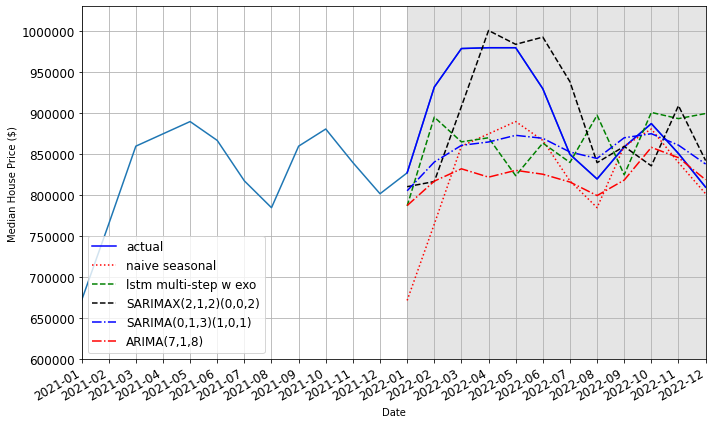

In [219]:
fig, ax = plt.subplots(figsize=(10, 6))
#plt.figure(figsize=(20, 20))
t_stats['Month'] = t_stats['Month'].astype(str)
t_stats['Month'] = pd.to_datetime(t_stats['Month'])
 
ax.plot(t_stats['Median Price'])
ax.plot(pred_df_Y_PLOT['actual'], 'b-', label='actual')
ax.plot(pred_df_Y_PLOT['pred_naive_seasonal'], 'r:', label='naive seasonal')
ax.plot(pred_df_Y_PLOT['pred_lstm_mt'], 'g--', label='lstm multi-step w exo')
ax.plot(pred_df_Y_PLOT['pred_SARIMAX_Y2'], 'k--', label='SARIMAX(2,1,2)(0,0,2)')
ax.plot(pred_df_Y_PLOT['pred_SARIMA_Y'], 'b-.', label='SARIMA(0,1,3)(1,0,1)')
ax.plot(pred_df_Y_PLOT['pred_ARIMA_Y'], 'r-.', label='ARIMA(7,1,8)')


ax.set_xlabel('Date')
ax.set_ylabel('Median House Price ($)')

ax.set_xticks(t_stats.index)
ax.set_xticklabels(t_stats['Month'].dt.strftime('%Y-%m'))
ax.axvspan(108, 119, color='#808080', alpha=0.2)
ax.set_xlim(96, 119)

ax.get_yaxis().get_major_formatter().set_scientific(False)
y_lower_limit = 600000  
ax.set_ylim(y_lower_limit, ax.get_ylim()[1])
ax.tick_params(axis='both', which='both', labelsize=12)

plt.grid(True)
legend = ax.legend(loc=0, prop={'size': 12})
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

# 2022 FISCAL QUARTERS 

In [81]:
target_trainQ1 = t_stats['Median Price'][:-17] 
exog_trainQ1 = x_stats[:-17]

target_trainQ2 = t_stats['Median Price'][:-14]
exog_trainQ2 = x_stats[:-14]

target_trainQ3 = t_stats['Median Price'][:-11]
exog_trainQ3 = x_stats[:-11]

target_trainQ4 = t_stats['Median Price'][:-8]
exog_trainQ4 = x_stats[:-8]

In [76]:
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
 
def optimize_SARIMA(endog: Union[pd.Series, list], order_list: list, d: 
 int, D: int, s: int) -> pd.DataFrame:
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(
                endog, 
                order=(order[0], d, order[1]),
                seasonal_order=(order[2], D, order[3], s),
                simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, aic])
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q,P,Q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

 
ps = range(0, 13, 1)
qs = range(0, 13, 1)    
Ps = [0]
Qs = [0]    

d = 1
D = 0
s = 12
 
ARIMA_order_list = list(product(ps, qs, Ps, Qs))

ARIMA_result_df1 = optimize_SARIMA(target_trainQ1, ARIMA_order_list, d, D, s)
ARIMA_result_df2 = optimize_SARIMA(target_trainQ2, ARIMA_order_list, d, D, s)
ARIMA_result_df3 = optimize_SARIMA(target_trainQ3, ARIMA_order_list, d, D, s)
ARIMA_result_df4 = optimize_SARIMA(target_trainQ4, ARIMA_order_list, d, D, s)

/var/folders/5t/6l7y1cln3zb54s7r50bzxx080000gn/T/ipykernel_65389/367736930.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/169 [00:00<?, ?it/s]

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/st

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/st

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-pa

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaco

  0%|          | 0/169 [00:00<?, ?it/s]

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/st

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaco

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive paramet

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaco

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-pa

  0%|          | 0/169 [00:00<?, ?it/s]

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/st

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaco

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaco

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaco

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.

  0%|          | 0/169 [00:00<?, ?it/s]

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-pa

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/st

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaco

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [77]:
ARIMA_result_df1.iloc[0:1]

,"(p,q,P,Q)",AIC
0,"(7, 8, 0, 0)",2525.104196


In [78]:
ARIMA_result_df2.iloc[0:2]

,"(p,q,P,Q)",AIC
0,"(11, 11, 0, 0)",2600.692220
1,"(7, 8, 0, 0)",2601.223213


In [79]:
ARIMA_result_df3.iloc[0:1]

,"(p,q,P,Q)",AIC
0,"(10, 11, 0, 0)",2668.138673


In [80]:
ARIMA_result_df4.iloc[0:1]

,"(p,q,P,Q)",AIC
0,"(9, 10, 0, 0)",2739.216587


In [82]:
ARIMA_model1 = SARIMAX(target_trainQ1, order=(7,1,8), simple_differencing=False)
ARIMA_model1_fit = ARIMA_model1.fit(disp=False)

ARIMA_model2 = SARIMAX(target_trainQ2, order=(11,1,11), simple_differencing=False)
ARIMA_model2_fit = ARIMA_model2.fit(disp=False)

ARIMA_model3 = SARIMAX(target_trainQ3, order=(10,1,11), simple_differencing=False)
ARIMA_model3_fit = ARIMA_model3.fit(disp=False)

ARIMA_model4 = SARIMAX(target_trainQ4, order=(9,1,10), simple_differencing=False)
ARIMA_model4_fit = ARIMA_model4.fit(disp=False)

test1 = t_stats.iloc[108:111]
test2 = t_stats.iloc[111:114]
test3 = t_stats.iloc[114:117]
test4 = t_stats.iloc[117:120]

test1['naive_seasonal'] = t_stats['Median Price'].iloc[96:99].values
test2['naive_seasonal'] = t_stats['Median Price'].iloc[99:102].values
test3['naive_seasonal'] = t_stats['Median Price'].iloc[102:105].values
test4['naive_seasonal'] = t_stats['Median Price'].iloc[105:108].values

ARIMA_pred1 = ARIMA_model1_fit.get_prediction(108,111).predicted_mean
test1['ARIMA_pred'] = ARIMA_pred1

ARIMA_pred2 = ARIMA_model2_fit.get_prediction(111,114).predicted_mean
test2['ARIMA_pred'] = ARIMA_pred2

ARIMA_pred3 = ARIMA_model3_fit.get_prediction(114,117).predicted_mean
test3['ARIMA_pred'] = ARIMA_pred3

ARIMA_pred4 = ARIMA_model4_fit.get_prediction(117,120).predicted_mean
test4['ARIMA_pred'] = ARIMA_pred4

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.

In [83]:
test4

,Month,Median Price,naive_seasonal,ARIMA_pred
117,2022-10-01,887500,880900,895833.886584
118,2022-11-01,851000,840000,876606.479998
119,2022-12-01,810000,802000,845099.904658


In [84]:
ps = range(0, 4, 1)
qs = range(0, 4, 1)
Ps = range(0, 4, 1)
Qs = range(0, 4, 1)
 
SARIMA_order_list = list(product(ps, qs, Ps, Qs))
 
d = 1
D = 0
s = 12
 
SARIMA_result_df1 = optimize_SARIMA(target_trainQ1, SARIMA_order_list, d, D, s)
SARIMA_result_df2 = optimize_SARIMA(target_trainQ2, SARIMA_order_list, d, D, s)
SARIMA_result_df3 = optimize_SARIMA(target_trainQ3, SARIMA_order_list, d, D, s)
SARIMA_result_df4 = optimize_SARIMA(target_trainQ4, SARIMA_order_list, d, D, s)

/var/folders/5t/6l7y1cln3zb54s7r50bzxx080000gn/T/ipykernel_65389/367736930.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/256 [00:00<?, ?it/s]

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to esti

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting pa

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sari

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting sea

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA param

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA param

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/5t/6l7y1cln3zb54s7r50bzxx080000gn/T/ipykernel_65389/367736930.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/256 [00:00<?, ?it/s]

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:902: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:] ** 2).mean()
/Users/user/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting season

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:902: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:] ** 2).mean()
/Users/user/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:902: RuntimeWarning: Mean of empty

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:902: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:] ** 2).mean()
/Users/user/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible s

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:902: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:] ** 2).mean()
/Users/user/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:902: RuntimeWarning: Mean of empty slice.
  params

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:902: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:] ** 2).mean()
/Users/user/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:902: RuntimeWarning: Mean of empt

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:902: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:] ** 2).mean()
/Users/user/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary s

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:902: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:] ** 2).mean()
/Users/user/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary s

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:902: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:] ** 2).mean()
/Users/user/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationa

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:902: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:] ** 2).mean()
/Users/user/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationa

  0%|          | 0/256 [00:00<?, ?it/s]

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving av

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving av

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameter

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive paramet

  0%|          | 0/256 [00:00<?, ?it/s]

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregre

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving av

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/u

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA param

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA param

In [85]:
SARIMA_result_df1[0:10]

,"(p,q,P,Q)",AIC
0,"(3, 0, 1, 1)",2510.704583
1,"(0, 3, 1, 1)",2511.036432
2,"(2, 1, 1, 1)",2511.049245
3,"(3, 0, 1, 2)",2512.267354
4,"(3, 0, 2, 1)",2512.312612
5,"(3, 1, 1, 1)",2512.632180
6,"(0, 3, 1, 2)",2512.636521
7,"(0, 3, 2, 1)",2512.677218
8,"(2, 0, 1, 1)",2512.741583
9,"(2, 1, 1, 2)",2512.745294


In [86]:
SARIMA_result_df2[0:10]

,"(p,q,P,Q)",AIC
0,"(3, 0, 1, 1)",2584.554811
1,"(2, 1, 1, 1)",2585.193393
2,"(0, 3, 1, 1)",2585.342346
3,"(3, 0, 1, 2)",2586.397881
4,"(3, 0, 2, 1)",2586.404858
5,"(3, 1, 1, 1)",2586.524351
6,"(2, 0, 1, 1)",2586.646984
7,"(2, 1, 1, 2)",2587.109013
8,"(2, 1, 2, 1)",2587.110797
9,"(2, 2, 1, 1)",2587.131419


In [87]:
SARIMA_result_df3[0:10]

,"(p,q,P,Q)",AIC
0,"(3, 0, 1, 1)",2654.225800
1,"(2, 1, 1, 1)",2654.638289
2,"(0, 3, 1, 1)",2654.753868
3,"(3, 0, 1, 2)",2656.152530
4,"(3, 0, 2, 1)",2656.156652
5,"(3, 1, 1, 1)",2656.187299
6,"(2, 2, 1, 1)",2656.513572
7,"(1, 3, 1, 1)",2656.524966
8,"(2, 0, 1, 1)",2656.569803
9,"(2, 1, 1, 2)",2656.611096


In [88]:
SARIMA_result_df4[0:10]

,"(p,q,P,Q)",AIC
0,"(0, 3, 1, 1)",2726.000337
1,"(2, 1, 1, 1)",2726.286814
2,"(3, 0, 1, 1)",2726.299261
3,"(1, 3, 1, 1)",2727.769864
4,"(0, 3, 1, 2)",2727.988895
5,"(0, 3, 2, 1)",2727.989675
6,"(3, 1, 1, 1)",2728.081215
7,"(2, 2, 1, 1)",2728.131761
8,"(2, 0, 1, 1)",2728.165803
9,"(2, 1, 2, 1)",2728.286811


In [89]:
SARIMA_model1 = SARIMAX(target_trainQ1, order=(3,1,0), seasonal_order=(1,0,1,12), simple_differencing=False)
SARIMA_model1_fit = SARIMA_model1.fit(disp=False)  

SARIMA_model2 = SARIMAX(target_trainQ2, order=(3,1,0), seasonal_order=(1,0,1,12), simple_differencing=False)
SARIMA_model2_fit = SARIMA_model2.fit(disp=False)

SARIMA_model3 = SARIMAX(target_trainQ3, order=(3,1,0), seasonal_order=(1,0,1,12), simple_differencing=False)
SARIMA_model3_fit = SARIMA_model3.fit(disp=False)

SARIMA_model4 = SARIMAX(target_trainQ4, order=(0,1,3), seasonal_order=(1,0,1,12), simple_differencing=False)
SARIMA_model4_fit = SARIMA_model4.fit(disp=False)


SARIMA_pred1 = SARIMA_model1_fit.get_prediction(108,111).predicted_mean
test1['SARIMA_pred'] = SARIMA_pred1

SARIMA_pred2 = SARIMA_model2_fit.get_prediction(111,114).predicted_mean
test2['SARIMA_pred'] = SARIMA_pred2

SARIMA_pred3 = SARIMA_model3_fit.get_prediction(114,117).predicted_mean
test3['SARIMA_pred'] = SARIMA_pred3

SARIMA_pred4 = SARIMA_model4_fit.get_prediction(117,120).predicted_mean
test4['SARIMA_pred'] = SARIMA_pred4

/var/folders/5t/6l7y1cln3zb54s7r50bzxx080000gn/T/ipykernel_65389/2708303507.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['SARIMA_pred'] = SARIMA_pred1
/var/folders/5t/6l7y1cln3zb54s7r50bzxx080000gn/T/ipykernel_65389/2708303507.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['SARIMA_pred'] = SARIMA_pred2
/var/folders/5t/6l7y1cln3zb54s7r50bzxx080000gn/T/ipykernel_65389/2708303507.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [93]:
test3

,Month,Median Price,naive_seasonal,ARIMA_pred,SARIMA_pred
114,2022-07-01,850000,817700,916460.528191,910132.799765
115,2022-08-01,820000,785000,888910.749922,908147.035707
116,2022-09-01,859000,860000,911642.657424,940993.914603


In [94]:
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX
 
def optimize_SARIMAX(endog: Union[pd.Series, list], exog: Union[pd.Series, 
 list], order_list: list, d: int, D: int, s: int) -> pd.DataFrame:
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(
                endog,
                exog,
                order=(order[0], d, order[1]),
                seasonal_order=(order[2], D, order[3], s),
                simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q,P,Q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', 
 ascending=True).reset_index(drop=True)
    
    return result_df



p = range(0, 4, 1)
d = 1
q = range(0, 4, 1)
P = range(0, 4, 1)
D = 1
Q = range(0, 4, 1)
s = 12
 
parameters = product(p, q, P, Q)
parameters_list = list(parameters)

In [95]:
result_df1 = optimize_SARIMAX(target_trainQ1, exog_trainQ1, parameters_list, d, D, s)
result_df2 = optimize_SARIMAX(target_trainQ2, exog_trainQ2, parameters_list, d, D, s)
result_df3 = optimize_SARIMAX(target_trainQ3, exog_trainQ3, parameters_list, d, D, s)
result_df4 = optimize_SARIMAX(target_trainQ4, exog_trainQ4, parameters_list, d, D, s)

/var/folders/5t/6l7y1cln3zb54s7r50bzxx080000gn/T/ipykernel_65389/1266213915.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/256 [00:00<?, ?it/s]

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All param

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All param

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting sea

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting sea

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few o

  0%|          | 0/256 [00:00<?, ?it/s]

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn(

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to esti

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to esti

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/

  0%|          | 0/256 [00:00<?, ?it/s]

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn(

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelih

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible start

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to esti

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelih

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible start

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible start

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/

  0%|          | 0/256 [00:00<?, ?it/s]

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization f

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will 

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will 

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will 

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/op

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive paramet

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [98]:
result_df1.iloc[0:8]

,"(p,q,P,Q)",AIC
0,"(3, 2, 0, 0)",2182.310291
1,"(3, 2, 1, 0)",2184.328809
2,"(3, 2, 0, 1)",2184.549971
3,"(2, 2, 0, 0)",2186.197375
4,"(3, 2, 2, 0)",2186.209981
5,"(3, 2, 0, 2)",2186.229768
6,"(1, 0, 0, 0)",2187.739233
7,"(0, 1, 0, 0)",2187.755343


In [99]:
result_df2.iloc[0:8]

,"(p,q,P,Q)",AIC
0,"(2, 2, 0, 0)",2259.095254
1,"(3, 2, 1, 1)",2264.295590
2,"(2, 3, 2, 0)",2264.898076
3,"(0, 0, 0, 1)",2265.681827
4,"(0, 0, 1, 0)",2265.720913
5,"(0, 0, 1, 1)",2265.767860
6,"(1, 0, 0, 0)",2265.768300
7,"(0, 1, 0, 0)",2265.785554


In [100]:
result_df3.iloc[0:8]

,"(p,q,P,Q)",AIC
0,"(2, 2, 0, 0)",2333.122145
1,"(0, 0, 1, 1)",2333.824198
2,"(2, 2, 1, 0)",2334.498917
3,"(0, 0, 0, 1)",2334.549339
4,"(0, 0, 1, 0)",2334.562920
5,"(1, 0, 0, 0)",2334.627168
6,"(0, 1, 0, 0)",2334.644741
7,"(2, 2, 1, 1)",2335.554797


In [101]:
result_df4.iloc[0:10]

,"(p,q,P,Q)",AIC
0,"(3, 3, 0, 0)",2399.453958
1,"(2, 2, 0, 0)",2400.121857
2,"(0, 0, 1, 1)",2400.293287
3,"(2, 2, 3, 0)",2400.981643
4,"(3, 3, 1, 0)",2401.160674
5,"(0, 0, 0, 1)",2401.554109
6,"(0, 0, 1, 0)",2401.555641
7,"(0, 1, 0, 0)",2401.578524
8,"(1, 0, 0, 0)",2401.582941
9,"(0, 0, 2, 1)",2402.149866


In [102]:
def recursive_forecast(parList, endog: Union[pd.Series, list], exog: Union[pd.Series, list], train_len: int, horizon: int, window: int, method: str) -> list:
    
    p = parList[0]
    q = parList[1]
    d = parList[2]
    P = parList[3]
    Q = parList[4]
    D = parList[5]
    s = parList[6]
    
    total_len = train_len + horizon

    if method == 'last':
        pred_last_value = []
        
        for i in range(train_len, total_len, window):
            last_value = endog[:i].iloc[-1]
            pred_last_value.extend(last_value for _ in range(window))
            
        return pred_last_value
    
    elif method == 'SARIMAX':
        pred_SARIMAX = []
        
        for i in range(train_len, total_len, window):
            model = SARIMAX(endog[:i], exog[:i], order=(p,d,q), seasonal_order=(P,D,Q,s), simple_differencing=False)
            res = model.fit(disp=False)
            predictions = res.get_prediction(exog=exog)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_SARIMAX.extend(oos_pred)
            
        return pred_SARIMAX

In [209]:
target_testQ1 = t_stats['Median Price'][108:111]
pred_df_Q1 = pd.DataFrame({'actual': target_testQ1})
pred_df_Q1['pred_naive_seasonal'] = t_stats['Median Price'].iloc[96:99].values  
TRAIN_LEN = len(target_trainQ1)
HORIZON = len(target_testQ1)
WINDOW = 1

parList = [0,0,0,0,0,0,0]
 
pred_last_value_Q1 = recursive_forecast(parList, t_stats['Median Price'], x_stats, TRAIN_LEN, HORIZON, 
 WINDOW, 'last')

# p = parList[0]
# q = parList[1]
# d = parList[2]
# P = parList[3]
# Q = parList[4]
# D = parList[5]
# s = parList[6]

# (p,q,P,Q)	AIC
# 0	(3, 2, 0, 0)	2182.310291
# 1	(3, 2, 1, 0)	2184.328809
# 2	(3, 2, 0, 1)	2184.549971
# 3	(2, 2, 0, 0)	2186.197375
# 4	(3, 2, 2, 0)	2186.209981


parList = [2,3,1,1,0,0,12]
pred_SARIMAX_Q1 = recursive_forecast(parList, t_stats['Median Price'], x_stats, TRAIN_LEN, HORIZON, WINDOW, 'SARIMAX')

pred_df_Q1['pred_last_value_Q1'] = pred_last_value_Q1
pred_df_Q1['pred_SARIMAX_Q1'] = pred_SARIMAX_Q1
pred_df_Q1['pred_SARIMA_Q1'] = test1['SARIMA_pred'].copy()
pred_df_Q1['pred_ARIMA_Q1'] = test1['ARIMA_pred'].copy()

pred_df_Q1['pred_lstm_st'] = [865908.53098035, 870940.68261981, 877222.61637449]

pred_df_Q1['pred_lstm_st1'] = [838510.13165712, 840783.63230824, 844267.94907451]

pred_df_Q1['pred_lstm_mt'] = [884959.79854465, 900580.47109842, 916212.55657077]

pred_df_Q1['pred_lstm_mt1'] = [865057.49192834, 868126.11508369, 871868.60692501]


mape_last_Q1 = mape(pred_df_Q1.actual, pred_df_Q1.pred_last_value_Q1)
mape_seasonal_Q1 = mape(pred_df_Q1.actual, pred_df_Q1.pred_naive_seasonal)
mape_LSTM_ST_Q1 = mape(pred_df_Q1.actual, pred_df_Q1.pred_lstm_st)
mape_LSTM_MT_Q1 = mape(pred_df_Q1.actual, pred_df_Q1.pred_lstm_mt)
mape_LSTM_ST1_Q1 = mape(pred_df_Q1.actual, pred_df_Q1.pred_lstm_st1)
mape_LSTM_MT1_Q1 = mape(pred_df_Q1.actual, pred_df_Q1.pred_lstm_mt1)
mape_SARIMAX_Q1 = mape(pred_df_Q1.actual, pred_df_Q1.pred_SARIMAX_Q1)
mape_SARIMA_Q1 = mape(pred_df_Q1.actual, pred_df_Q1.pred_SARIMA_Q1)
mape_ARIMA_Q1 = mape(pred_df_Q1.actual, pred_df_Q1.pred_ARIMA_Q1)

rmse_last_Q1 = rmse(pred_df_Q1.actual, pred_df_Q1.pred_last_value_Q1)
rmse_seasonal_Q1 = rmse(pred_df_Q1.actual, pred_df_Q1.pred_naive_seasonal)
rmse_LSTM_ST_Q1 = rmse(pred_df_Q1.actual, pred_df_Q1.pred_lstm_st)
rmse_LSTM_MT_Q1 = rmse(pred_df_Q1.actual, pred_df_Q1.pred_lstm_mt)
rmse_LSTM_ST1_Q1 = rmse(pred_df_Q1.actual, pred_df_Q1.pred_lstm_st1)
rmse_LSTM_MT1_Q1 = rmse(pred_df_Q1.actual, pred_df_Q1.pred_lstm_mt1)
rmse_SARIMAX_Q1 = rmse(pred_df_Q1.actual, pred_df_Q1.pred_SARIMAX_Q1)
rmse_SARIMA_Q1 = rmse(pred_df_Q1.actual, pred_df_Q1.pred_SARIMA_Q1)
rmse_ARIMA_Q1 = rmse(pred_df_Q1.actual, pred_df_Q1.pred_ARIMA_Q1)


print("MAPE LAST_Q1: ", mape_last_Q1)
print("MAPE SEASONAL_Q1: ", mape_seasonal_Q1)
print("MAPE LSTM_ST_Q1: ", mape_LSTM_ST_Q1)
print("MAPE LSTM_MT_Q1: ", mape_LSTM_MT_Q1)
print("MAPE LSTM_ST1_Q1: ", mape_LSTM_ST1_Q1)
print("MAPE LSTM_MT1_Q1: ", mape_LSTM_MT1_Q1)
print("MAPE ARIMA_Q1: ", mape_ARIMA_Q1)
print("MAPE SARIMA_Q1: ", mape_SARIMA_Q1)
print("MAPE SARIMAX_Q1: ", mape_SARIMAX_Q1, '\n')

print("RMSE LAST_Q1: ", rmse_last_Q1)
print("RMSE SEASONAL_Q1: ", rmse_seasonal_Q1)
print("RMSE LSTM_ST_Q1: ", rmse_LSTM_ST_Q1)
print("RMSE LSTM_MT_Q1: ", rmse_LSTM_MT_Q1)
print("RMSE LSTM_ST1_Q1: ", rmse_LSTM_ST1_Q1)
print("RMSE LSTM_MT1_Q1: ", rmse_LSTM_MT1_Q1)
print("RMSE ARIMA_Q1: ", rmse_ARIMA_Q1)
print("RMSE SARIMA_Q1: ", rmse_SARIMA_Q1)
print("RMSE SARIMAX_Q1: ", rmse_SARIMAX_Q1)

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE LAST_Q1:  6.364944836425968
MAPE SEASONAL_Q1:  16.28841873032934
MAPE LSTM_ST_Q1:  7.196332916657881
MAPE LSTM_MT_Q1:  5.576134228247056
MAPE LSTM_ST1_Q1:  8.293301651865464
MAPE LSTM_MT1_Q1:  7.44501063925488
MAPE ARIMA_Q1:  10.697018175723912
MAPE SARIMA_Q1:  8.254743271967504
MAPE SARIMAX_Q1:  7.017843498422706 

RMSE LAST_Q1:  67772.90510717884
RMSE SEASONAL_Q1:  148582.46868321983
RMSE LSTM_ST_Q1:  72023.35572265781
RMSE LSTM_MT_Q1:  52380.27076921151
RMSE LSTM_ST1_Q1:  94153.02133685406
RMSE LSTM_MT1_Q1:  75205.43809334836
RMSE ARIMA_Q1:  109869.4426614017
RMSE SARIMA_Q1:  87388.52610546183
RMSE SARIMAX_Q1:  79608.79682017058


/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [210]:
pred_df_Q1_PLOT = pred_df_Q1.copy()
pred_df_Q1_PLOT['Month'] = t_stats['Month'].iloc[108:111]
cols = pred_df_Q1_PLOT.columns.tolist()
cols = cols[-1:] + cols[:-1]
pred_df_Q1_PLOT = pred_df_Q1_PLOT[cols]
pred_df_Q1_PLOT

,Month,actual,pred_naive_seasonal,pred_last_value_Q1,pred_SARIMAX_Q1,pred_SARIMA_Q1,pred_ARIMA_Q1,pred_lstm_st,pred_lstm_st1,pred_lstm_mt,pred_lstm_mt1
108,2022-01-01,827500,672000,802000,837346.435961,803969.446368,787608.273210,865908.530980,838510.131657,884959.798545,865057.491928
109,2022-02-01,932000,765000,827500,813779.613484,839637.306463,817383.132332,870940.682620,840783.632308,900580.471098,868126.115084
110,2022-03-01,979000,860000,932000,908717.217582,861417.223314,832420.645820,877222.616374,844267.949075,916212.556571,871868.606925


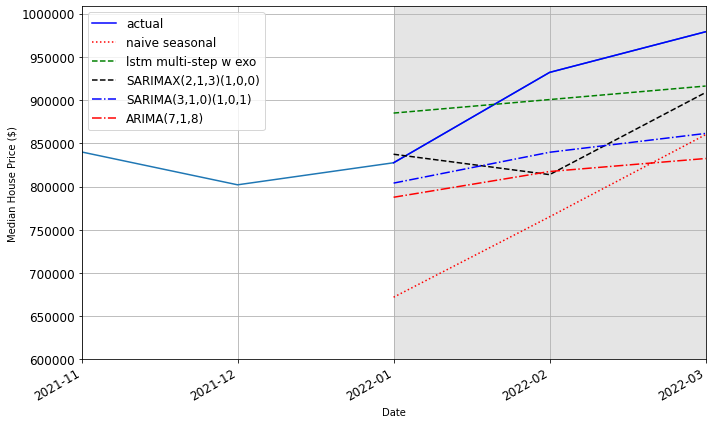

In [211]:
fig, ax = plt.subplots(figsize=(10, 6))
#plt.figure(figsize=(20, 20))
t_stats['Month'] = t_stats['Month'].astype(str)
t_stats['Month'] = pd.to_datetime(t_stats['Month'])
 
ax.plot(t_stats['Median Price'])
ax.plot(pred_df_Q1_PLOT['actual'], 'b-', label='actual')
ax.plot(pred_df_Q1_PLOT['pred_naive_seasonal'], 'r:', label='naive seasonal')
ax.plot(pred_df_Q1_PLOT['pred_lstm_mt'], 'g--', label='lstm multi-step w exo')
ax.plot(pred_df_Q1_PLOT['pred_SARIMAX_Q1'], 'k--', label='SARIMAX(2,1,3)(1,0,0)')
ax.plot(pred_df_Q1_PLOT['pred_SARIMA_Q1'], 'b-.', label='SARIMA(3,1,0)(1,0,1)')
ax.plot(pred_df_Q1_PLOT['pred_ARIMA_Q1'], 'r-.', label='ARIMA(7,1,8)')


ax.set_xlabel('Date')
ax.set_ylabel('Median House Price ($)')

ax.set_xticks(t_stats.index)
ax.set_xticklabels(t_stats['Month'].dt.strftime('%Y-%m'))
ax.axvspan(108, 110, color='#808080', alpha=0.2)
ax.set_xlim(106, 110)

ax.get_yaxis().get_major_formatter().set_scientific(False)
y_lower_limit = 600000  
ax.set_ylim(y_lower_limit, ax.get_ylim()[1])
ax.tick_params(axis='both', which='both', labelsize=12)

plt.grid(True)

legend = ax.legend(loc=0, prop={'size': 12})
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

In [140]:
target_testQ2 = t_stats['Median Price'][111:114]
pred_df_Q2 = pd.DataFrame({'actual': target_testQ2})
pred_df_Q2['pred_naive_seasonal'] = t_stats['Median Price'].iloc[99:102].values  
TRAIN_LEN = len(target_trainQ2)
HORIZON = len(target_testQ2)
WINDOW = 1

parList = [0,0,0,0,0,0,0]
 
pred_last_value_Q2 = recursive_forecast(parList, t_stats['Median Price'], x_stats, TRAIN_LEN, HORIZON, 
 WINDOW, 'last')

# p = parList[0]
# q = parList[1]
# d = parList[2]
# P = parList[3]
# Q = parList[4]
# D = parList[5]
# s = parList[6]

# (p,q,P,Q)	AIC
# 0	(2, 2, 0, 0)	2259.095254
# 1	(3, 2, 1, 1)	2264.295590
# 2	(2, 3, 2, 0)	2264.898076
# 3	(0, 0, 0, 1)	2265.681827
# 4	(0, 0, 1, 0)	2265.720913
# 5	(0, 0, 1, 1)	2265.767860
# 6	(1, 0, 0, 0)	2265.768300
# 7	(0, 1, 0, 0)	2265.785554


parList = [11,11,1,0,1,1,12]
pred_SARIMAX_Q2 = recursive_forecast(parList, t_stats['Median Price'], x_stats, TRAIN_LEN, HORIZON, WINDOW, 'SARIMAX')

pred_df_Q2['pred_last_value_Q2'] = pred_last_value_Q2
pred_df_Q2['pred_SARIMAX_Q2'] = pred_SARIMAX_Q2
pred_df_Q2['pred_SARIMA_Q2'] = test2['SARIMA_pred'].copy()
pred_df_Q2['pred_ARIMA_Q2'] = test2['ARIMA_pred'].copy()

pred_df_Q2['pred_lstm_st'] = [884478.19364071, 891045.11269927, 897526.67123079]

pred_df_Q2['pred_lstm_st1'] = [849214.26746249, 855270.88049054, 862108.23169351]

pred_df_Q2['pred_lstm_mt'] = [930562.71466613, 942442.21225381, 951406.75589442]

pred_df_Q2['pred_lstm_mt1'] = [876960.92963219, 883673.21145535, 890876.04618072]


mape_last_Q2 = mape(pred_df_Q2.actual, pred_df_Q2.pred_last_value_Q2)
mape_seasonal_Q2 = mape(pred_df_Q2.actual, pred_df_Q2.pred_naive_seasonal)
mape_LSTM_ST_Q2 = mape(pred_df_Q2.actual, pred_df_Q2.pred_lstm_st)
mape_LSTM_MT_Q2 = mape(pred_df_Q2.actual, pred_df_Q2.pred_lstm_mt)
mape_LSTM_ST1_Q2 = mape(pred_df_Q2.actual, pred_df_Q2.pred_lstm_st1)
mape_LSTM_MT1_Q2 = mape(pred_df_Q2.actual, pred_df_Q2.pred_lstm_mt1)
mape_SARIMAX_Q2 = mape(pred_df_Q2.actual, pred_df_Q2.pred_SARIMAX_Q2)
mape_SARIMA_Q2 = mape(pred_df_Q2.actual, pred_df_Q2.pred_SARIMA_Q2)
mape_ARIMA_Q2 = mape(pred_df_Q2.actual, pred_df_Q2.pred_ARIMA_Q2)

rmse_last_Q2 = rmse(pred_df_Q2.actual, pred_df_Q2.pred_last_value_Q2)
rmse_seasonal_Q2 = rmse(pred_df_Q2.actual, pred_df_Q2.pred_naive_seasonal)
rmse_LSTM_ST_Q2 = rmse(pred_df_Q2.actual, pred_df_Q2.pred_lstm_st)
rmse_LSTM_MT_Q2 = rmse(pred_df_Q2.actual, pred_df_Q2.pred_lstm_mt)
rmse_LSTM_ST1_Q2 = rmse(pred_df_Q2.actual, pred_df_Q2.pred_lstm_st1)
rmse_LSTM_MT1_Q2 = rmse(pred_df_Q2.actual, pred_df_Q2.pred_lstm_mt1)
rmse_SARIMAX_Q2 = rmse(pred_df_Q2.actual, pred_df_Q2.pred_SARIMAX_Q2)
rmse_SARIMA_Q2 = rmse(pred_df_Q2.actual, pred_df_Q2.pred_SARIMA_Q2)
rmse_ARIMA_Q2 = rmse(pred_df_Q2.actual, pred_df_Q2.pred_ARIMA_Q2)


print("MAPE LAST_Q2: ", mape_last_Q2)
print("MAPE SEASONAL_Q2: ", mape_seasonal_Q2)
print("MAPE LSTM_ST_Q2: ", mape_LSTM_ST_Q2)
print("MAPE LSTM_MT_Q2: ", mape_LSTM_MT_Q2)
print("MAPE LSTM_ST1_Q2: ", mape_LSTM_ST1_Q2)
print("MAPE LSTM_MT1_Q2: ", mape_LSTM_MT1_Q2)
print("MAPE ARIMA_Q2: ", mape_ARIMA_Q2)
print("MAPE SARIMA_Q2: ", mape_SARIMA_Q2)
print("MAPE SARIMAX_Q2: ", mape_SARIMAX_Q2, '\n')

print("RMSE LAST_Q2: ", rmse_last_Q2)
print("RMSE SEASONAL_Q2: ", rmse_seasonal_Q2)
print("RMSE LSTM_ST_Q2: ", rmse_LSTM_ST_Q2)
print("RMSE LSTM_MT_Q2: ", rmse_LSTM_MT_Q2)
print("RMSE LSTM_ST1_Q2: ", rmse_LSTM_ST1_Q2)
print("RMSE LSTM_MT1_Q2: ", rmse_LSTM_MT1_Q2)
print("RMSE ARIMA_Q2: ", rmse_ARIMA_Q2)
print("RMSE SARIMA_Q2: ", rmse_SARIMA_Q2)
print("RMSE SARIMAX_Q2: ", rmse_SARIMAX_Q2)


/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters fou

MAPE LAST_Q2:  1.8261283007826787
MAPE SEASONAL_Q2:  8.890717577353522
MAPE LSTM_ST_Q2:  7.438636065307748
MAPE LSTM_MT_Q2:  3.7262833275176406
MAPE LSTM_ST1_Q2:  11.124378075636104
MAPE LSTM_MT1_Q2:  8.18344391527621
MAPE ARIMA_Q2:  1.8655733380408908
MAPE SARIMA_Q2:  1.7285863715293286
MAPE SARIMAX_Q2:  1.65239952138722 

RMSE LAST_Q2:  28873.286384938358
RMSE SEASONAL_Q2:  87738.2470761754
RMSE LSTM_ST_Q2:  77657.16225002577
RMSE LSTM_MT_Q2:  37916.05552398446
RMSE LSTM_ST1_Q2:  111462.33039725483
RMSE LSTM_MT1_Q2:  84511.50607272629
RMSE ARIMA_Q2:  28850.525725737876
RMSE SARIMA_Q2:  20354.024279549285
RMSE SARIMAX_Q2:  18524.400440498415


/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [142]:
pred_df_Q2_PLOT = pred_df_Q2.copy()
pred_df_Q2_PLOT['Month'] = t_stats['Month'].iloc[111:114]
cols = pred_df_Q2_PLOT.columns.tolist()
cols = cols[-1:] + cols[:-1]
pred_df_Q2_PLOT = pred_df_Q2_PLOT[cols]
pred_df_Q2_PLOT

,Month,actual,pred_naive_seasonal,pred_last_value_Q2,pred_SARIMAX_Q2,pred_SARIMA_Q2,pred_ARIMA_Q2,pred_lstm_st,pred_lstm_st1,pred_lstm_mt,pred_lstm_mt1
111,2022-04-01,980000,875000,979000,955757.455982,974153.694640,979927.875718,884478.193641,849214.267462,930562.714666,876960.929632
112,2022-05-01,980000,890000,980000,977674.033710,970164.433208,982168.211683,891045.112699,855270.880491,942442.212254,883673.211455
113,2022-06-01,930000,867000,980000,950888.972578,963345.783131,979923.463022,897526.671231,862108.231694,951406.755894,890876.046181


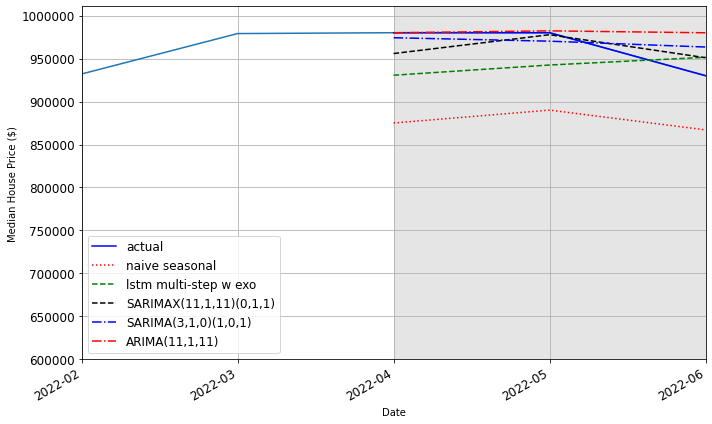

In [214]:
fig, ax = plt.subplots(figsize=(10, 6))
#plt.figure(figsize=(20, 20))
t_stats['Month'] = t_stats['Month'].astype(str)
t_stats['Month'] = pd.to_datetime(t_stats['Month'])
 
ax.plot(t_stats['Median Price'])
ax.plot(pred_df_Q2_PLOT['actual'], 'b-', label='actual')
ax.plot(pred_df_Q2_PLOT['pred_naive_seasonal'], 'r:', label='naive seasonal')
ax.plot(pred_df_Q2_PLOT['pred_lstm_mt'], 'g--', label='lstm multi-step w exo')
ax.plot(pred_df_Q2_PLOT['pred_SARIMAX_Q2'], 'k--', label='SARIMAX(11,1,11)(0,1,1)')
ax.plot(pred_df_Q2_PLOT['pred_SARIMA_Q2'], 'b-.', label='SARIMA(3,1,0)(1,0,1)')
ax.plot(pred_df_Q2_PLOT['pred_ARIMA_Q2'], 'r-.', label='ARIMA(11,1,11)')


ax.set_xlabel('Date')
ax.set_ylabel('Median House Price ($)')

ax.set_xticks(t_stats.index)
ax.set_xticklabels(t_stats['Month'].dt.strftime('%Y-%m'))
ax.axvspan(111, 113, color='#808080', alpha=0.2)
ax.set_xlim(109, 113)

ax.get_yaxis().get_major_formatter().set_scientific(False)
y_lower_limit = 600000  
ax.set_ylim(y_lower_limit, ax.get_ylim()[1])
ax.tick_params(axis='both', which='both', labelsize=12)

plt.grid(True)

legend = ax.legend(loc=0, prop={'size': 12})
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

In [215]:
best_modelSARIMAX = SARIMAX(target_trainQ2, exog_trainQ2, order=(11,1,11), 
 seasonal_order=(0,1,1,12), simple_differencing=False)
best_modelSARIMAX = best_modelSARIMAX.fit(disp=False)
 
print(best_modelSARIMAX.summary())

best_modelSARIMA = SARIMAX(target_trainQ2, order=(3,1,0), 
 seasonal_order=(1,0,1,12), simple_differencing=False)
best_modelSARIMA = best_modelSARIMA.fit(disp=False)
 
print(best_modelSARIMA.summary())

best_modelARIMA = SARIMAX(target_trainQ2, order=(11,1,11), simple_differencing=False)
best_modelARIMA = best_modelARIMA.fit(disp=False)
 
print(best_modelARIMA.summary())

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                       SARIMAX Results                                        
Dep. Variable:                           Median Price   No. Observations:                  111
Model:             SARIMAX(11, 1, 11)x(0, 1, [1], 12)   Log Likelihood               -1160.930
Date:                                Tue, 29 Aug 2023   AIC                           2391.861
Time:                                        20:50:47   BIC                           2482.335
Sample:                                             0   HQIC                          2428.456
                                                - 111                                         
Covariance Type:                                  opg                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
CPI_Can                  -6677.8758   6053.207     -1.

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:           Median Price   No. Observations:                  111
Model:             SARIMAX(11, 1, 11)   Log Likelihood               -1277.346
Date:                Tue, 29 Aug 2023   AIC                           2600.692
Time:                        20:50:48   BIC                           2662.803
Sample:                             0   HQIC                          2625.885
                                - 111                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2775      0.236      1.175      0.240      -0.185       0.741
ar.L2          0.7072      0.265      2.668      0.008       0.188       1.227
ar.L3         -0.9305      0.081    -11.430      0.0

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [159]:
target_testQ3 = t_stats['Median Price'][114:117]
pred_df_Q3 = pd.DataFrame({'actual': target_testQ3})
pred_df_Q3['pred_naive_seasonal'] = t_stats['Median Price'].iloc[102:105].values  
TRAIN_LEN = len(target_trainQ3)
HORIZON = len(target_testQ3)
WINDOW = 1

parList = [0,0,0,0,0,0,0]
 
pred_last_value_Q3 = recursive_forecast(parList, t_stats['Median Price'], x_stats, TRAIN_LEN, HORIZON, 
 WINDOW, 'last')

# p = parList[0]
# q = parList[1]
# d = parList[2]
# P = parList[3]
# Q = parList[4]
# D = parList[5]
# s = parList[6]


# (p,q,P,Q)	AIC
# 0	(2, 2, 0, 0)	2333.122145
# 1	(0, 0, 1, 1)	2333.824198
# 2	(2, 2, 1, 0)	2334.498917
# 3	(0, 0, 0, 1)	2334.549339
# 4	(0, 0, 1, 0)	2334.562920
# 5	(1, 0, 0, 0)	2334.627168


parList = [2,2,1,0,1,0,12]
pred_SARIMAX_Q3 = recursive_forecast(parList, t_stats['Median Price'], x_stats, TRAIN_LEN, HORIZON, WINDOW, 'SARIMAX')

pred_df_Q3['pred_last_value_Q3'] = pred_last_value_Q3
pred_df_Q3['pred_SARIMAX_Q3'] = pred_SARIMAX_Q3
pred_df_Q3['pred_SARIMA_Q3'] = test3['SARIMA_pred'].copy()
pred_df_Q3['pred_ARIMA_Q3'] = test3['ARIMA_pred'].copy()

pred_df_Q3['pred_lstm_st'] = [919890.21763206, 928233.70265961, 936934.46606398]

pred_df_Q3['pred_lstm_st1'] = [873483.56866837, 878611.75090075, 881744.32691932]

pred_df_Q3['pred_lstm_mt'] = [867046.91895843, 865024.84017611, 861569.32583451]

pred_df_Q3['pred_lstm_mt1'] = [897555.20352721, 902857.98990726, 906591.63504839]


mape_last_Q3 = mape(pred_df_Q3.actual, pred_df_Q3.pred_last_value_Q3)
mape_seasonal_Q3 = mape(pred_df_Q3.actual, pred_df_Q3.pred_naive_seasonal)
mape_LSTM_ST_Q3 = mape(pred_df_Q3.actual, pred_df_Q3.pred_lstm_st)
mape_LSTM_MT_Q3 = mape(pred_df_Q3.actual, pred_df_Q3.pred_lstm_mt)
mape_LSTM_ST1_Q3 = mape(pred_df_Q3.actual, pred_df_Q3.pred_lstm_st1)
mape_LSTM_MT1_Q3 = mape(pred_df_Q3.actual, pred_df_Q3.pred_lstm_mt1)
mape_SARIMAX_Q3 = mape(pred_df_Q3.actual, pred_df_Q3.pred_SARIMAX_Q3)
mape_SARIMA_Q3 = mape(pred_df_Q3.actual, pred_df_Q3.pred_SARIMA_Q3)
mape_ARIMA_Q3 = mape(pred_df_Q3.actual, pred_df_Q3.pred_ARIMA_Q3)

rmse_last_Q3 = rmse(pred_df_Q3.actual, pred_df_Q3.pred_last_value_Q3)
rmse_seasonal_Q3 = rmse(pred_df_Q3.actual, pred_df_Q3.pred_naive_seasonal)
rmse_LSTM_ST_Q3 = rmse(pred_df_Q3.actual, pred_df_Q3.pred_lstm_st)
rmse_LSTM_MT_Q3 = rmse(pred_df_Q3.actual, pred_df_Q3.pred_lstm_mt)
rmse_LSTM_ST1_Q3 = rmse(pred_df_Q3.actual, pred_df_Q3.pred_lstm_st1)
rmse_LSTM_MT1_Q3 = rmse(pred_df_Q3.actual, pred_df_Q3.pred_lstm_mt1)
rmse_SARIMAX_Q3 = rmse(pred_df_Q3.actual, pred_df_Q3.pred_SARIMAX_Q3)
rmse_SARIMA_Q3 = rmse(pred_df_Q3.actual, pred_df_Q3.pred_SARIMA_Q3)
rmse_ARIMA_Q3 = rmse(pred_df_Q3.actual, pred_df_Q3.pred_ARIMA_Q3)


print("MAPE LAST_Q3: ", mape_last_Q3)
print("MAPE SEASONAL_Q3: ", mape_seasonal_Q3)
print("MAPE LSTM_ST_Q3: ", mape_LSTM_ST_Q3)
print("MAPE LSTM_MT_Q3: ", mape_LSTM_MT_Q3)
print("MAPE LSTM_ST1_Q3: ", mape_LSTM_ST1_Q3)
print("MAPE LSTM_MT1_Q3: ", mape_LSTM_MT1_Q3)
print("MAPE ARIMA_Q3: ", mape_ARIMA_Q3)
print("MAPE SARIMA_Q3: ", mape_SARIMA_Q3)
print("MAPE SARIMAX_Q3: ", mape_SARIMAX_Q3, '\n')

print("RMSE LAST_Q3: ", rmse_last_Q3)
print("RMSE SEASONAL_Q3: ", rmse_seasonal_Q3)
print("RMSE LSTM_ST_Q3: ", rmse_LSTM_ST_Q3)
print("RMSE LSTM_MT_Q3: ", rmse_LSTM_MT_Q3)
print("RMSE LSTM_ST1_Q3: ", rmse_LSTM_ST1_Q3)
print("RMSE LSTM_MT1_Q3: ", rmse_LSTM_MT1_Q3)
print("RMSE ARIMA_Q3: ", rmse_ARIMA_Q3)
print("RMSE SARIMA_Q3: ", rmse_SARIMA_Q3)
print("RMSE SARIMAX_Q3: ", rmse_SARIMAX_Q3)


/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE LAST_Q3:  5.8701547571525845
MAPE SEASONAL_Q3:  2.728235706105606
MAPE LSTM_ST_Q3:  10.164769146955479
MAPE LSTM_MT_Q3:  2.59848688721268
MAPE LSTM_ST1_Q3:  4.186105087081182
MAPE LSTM_MT1_Q3:  7.079905355231605
MAPE ARIMA_Q3:  7.450333633796102
MAPE SARIMA_Q3:  9.123120268635203
MAPE SARIMAX_Q3:  4.590632125349451 

RMSE LAST_Q3:  54224.84055608955
RMSE SEASONAL_Q3:  27503.272532555104
RMSE LSTM_ST_Q3:  86934.7608128134
RMSE LSTM_MT_Q3:  27835.43972530589
RMSE LSTM_ST1_Q3:  38747.55797925219
RMSE LSTM_MT1_Q3:  61622.25680321769
RMSE ARIMA_Q3:  63079.16360369953
RMSE SARIMA_Q3:  77693.5337149766
RMSE SARIMAX_Q3:  52636.9293847246


/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [150]:
pred_df_Q3_PLOT = pred_df_Q3.copy()
pred_df_Q3_PLOT['Month'] = t_stats['Month'].iloc[114:117]
cols = pred_df_Q3_PLOT.columns.tolist()
cols = cols[-1:] + cols[:-1]
pred_df_Q3_PLOT = pred_df_Q3_PLOT[cols]
pred_df_Q3_PLOT

,Month,actual,pred_naive_seasonal,pred_last_value_Q3,pred_SARIMAX_Q3,pred_SARIMA_Q3,pred_ARIMA_Q3,pred_lstm_st,pred_lstm_st1,pred_lstm_mt,pred_lstm_mt1
114,2022-07-01,850000,817700,930000,924367.493040,910132.799765,916460.528191,919890.217632,873483.568668,867046.918958,897555.203527
115,2022-08-01,820000,785000,850000,846246.400306,908147.035707,888910.749922,928233.702660,878611.750901,865024.840176,902857.989907
116,2022-09-01,859000,860000,820000,837296.627887,940993.914603,911642.657424,936934.466064,881744.326919,861569.325835,906591.635048


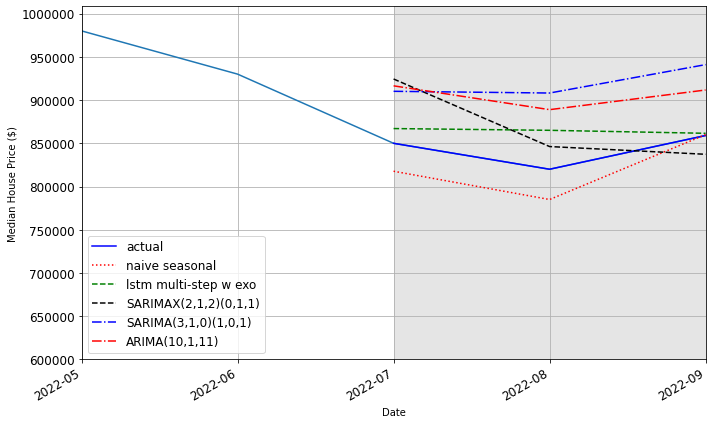

In [160]:
fig, ax = plt.subplots(figsize=(10, 6))
#plt.figure(figsize=(20, 20))
t_stats['Month'] = t_stats['Month'].astype(str)
t_stats['Month'] = pd.to_datetime(t_stats['Month'])
 
ax.plot(t_stats['Median Price'])
ax.plot(pred_df_Q3_PLOT['actual'], 'b-', label='actual')
ax.plot(pred_df_Q3_PLOT['pred_naive_seasonal'], 'r:', label='naive seasonal')
ax.plot(pred_df_Q3_PLOT['pred_lstm_mt'], 'g--', label='lstm multi-step w exo')
ax.plot(pred_df_Q3_PLOT['pred_SARIMAX_Q3'], 'k--', label='SARIMAX(2,1,2)(0,1,1)')
ax.plot(pred_df_Q3_PLOT['pred_SARIMA_Q3'], 'b-.', label='SARIMA(3,1,0)(1,0,1)')
ax.plot(pred_df_Q3_PLOT['pred_ARIMA_Q3'], 'r-.', label='ARIMA(10,1,11)')


ax.set_xlabel('Date')
ax.set_ylabel('Median House Price ($)')

ax.set_xticks(t_stats.index)
ax.set_xticklabels(t_stats['Month'].dt.strftime('%Y-%m'))
ax.axvspan(114, 116, color='#808080', alpha=0.2)
ax.set_xlim(112, 116)

ax.get_yaxis().get_major_formatter().set_scientific(False)
y_lower_limit = 600000  
ax.set_ylim(y_lower_limit, ax.get_ylim()[1])
ax.tick_params(axis='both', which='both', labelsize=12)

plt.grid(True)

legend = ax.legend(loc=0, prop={'size': 12})
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

In [216]:
best_modelSARIMAX = SARIMAX(target_trainQ3, exog_trainQ3, order=(2,1,2), 
 seasonal_order=(0,1,1,12), simple_differencing=False)
best_modelSARIMAX = best_modelSARIMAX.fit(disp=False)
 
print(best_modelSARIMAX.summary())

best_modelSARIMA = SARIMAX(target_trainQ3, order=(3,1,0), 
 seasonal_order=(1,0,1,12), simple_differencing=False)
best_modelSARIMA = best_modelSARIMA.fit(disp=False)
 
print(best_modelSARIMA.summary())

best_modelARIMA = SARIMAX(target_trainQ3, order=(10,1,11), simple_differencing=False)
best_modelARIMA = best_modelARIMA.fit(disp=False)
 
print(best_modelARIMA.summary())

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                         Median Price   No. Observations:                  114
Model:             SARIMAX(2, 1, 2)x(0, 1, [1], 12)   Log Likelihood               -1200.458
Date:                              Tue, 29 Aug 2023   AIC                           2434.916
Time:                                      22:12:18   BIC                           2479.373
Sample:                                           0   HQIC                          2452.914
                                              - 114                                         
Covariance Type:                                opg                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
CPI_Can                  -7645.1268   4909.807     -1.557      0.119  

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [184]:
target_testQ4 = t_stats['Median Price'][117:120]
pred_df_Q4 = pd.DataFrame({'actual': target_testQ4})
pred_df_Q4['pred_naive_seasonal'] = t_stats['Median Price'].iloc[105:108].values  
TRAIN_LEN = len(target_trainQ4)
HORIZON = len(target_testQ4)
WINDOW = 1

parList = [0,0,0,0,0,0,0]
 
pred_last_value_Q4 = recursive_forecast(parList, t_stats['Median Price'], x_stats, TRAIN_LEN, HORIZON, 
 WINDOW, 'last')

# p = parList[0]
# q = parList[1]
# d = parList[2]
# P = parList[3]
# Q = parList[4]
# D = parList[5]
# s = parList[6]

# (p,q,P,Q)	AIC
# 0	(3, 3, 0, 0)	2399.453958
# 1	(2, 2, 0, 0)	2400.121857
# 2	(0, 0, 1, 1)	2400.293287
# 3	(2, 2, 3, 0)	2400.981643
# 4	(3, 3, 1, 0)	2401.160674
# 5	(0, 0, 0, 1)	2401.554109

parList = [7,6,1,1,0,1,12]
pred_SARIMAX_Q4 = recursive_forecast(parList, t_stats['Median Price'], x_stats, TRAIN_LEN, HORIZON, WINDOW, 'SARIMAX')

pred_df_Q4['pred_last_value_Q4'] = pred_last_value_Q4
pred_df_Q4['pred_SARIMAX_Q4'] = pred_SARIMAX_Q4
pred_df_Q4['pred_SARIMA_Q4'] = test4['SARIMA_pred'].copy()
pred_df_Q4['pred_ARIMA_Q4'] = test4['ARIMA_pred'].copy()

pred_df_Q4['pred_lstm_st'] = [859592.08834171, 864564.67670202, 868874.64046478]

pred_df_Q4['pred_lstm_st1'] = [896253.75938416, 897477.40659118, 897634.45240259]

pred_df_Q4['pred_lstm_mt'] = [874722.51188755, 874357.23096132, 873065.61273336]

pred_df_Q4['pred_lstm_mt1'] = [913003.29789519, 915404.13025022, 917106.98497295]


mape_last_Q4 = mape(pred_df_Q4.actual, pred_df_Q4.pred_last_value_Q4)
mape_seasonal_Q4 = mape(pred_df_Q4.actual, pred_df_Q4.pred_naive_seasonal)
mape_LSTM_ST_Q4 = mape(pred_df_Q4.actual, pred_df_Q4.pred_lstm_st)
mape_LSTM_MT_Q4 = mape(pred_df_Q4.actual, pred_df_Q4.pred_lstm_mt)
mape_LSTM_ST1_Q4 = mape(pred_df_Q4.actual, pred_df_Q4.pred_lstm_st1)
mape_LSTM_MT1_Q4 = mape(pred_df_Q4.actual, pred_df_Q4.pred_lstm_mt1)
mape_SARIMAX_Q4 = mape(pred_df_Q4.actual, pred_df_Q4.pred_SARIMAX_Q4)
mape_SARIMA_Q4 = mape(pred_df_Q4.actual, pred_df_Q4.pred_SARIMA_Q4)
mape_ARIMA_Q4 = mape(pred_df_Q4.actual, pred_df_Q4.pred_ARIMA_Q4)

rmse_last_Q4 = rmse(pred_df_Q4.actual, pred_df_Q4.pred_last_value_Q4)
rmse_seasonal_Q4 = rmse(pred_df_Q4.actual, pred_df_Q4.pred_naive_seasonal)
rmse_LSTM_ST_Q4 = rmse(pred_df_Q4.actual, pred_df_Q4.pred_lstm_st)
rmse_LSTM_MT_Q4 = rmse(pred_df_Q4.actual, pred_df_Q4.pred_lstm_mt)
rmse_LSTM_ST1_Q4 = rmse(pred_df_Q4.actual, pred_df_Q4.pred_lstm_st1)
rmse_LSTM_MT1_Q4 = rmse(pred_df_Q4.actual, pred_df_Q4.pred_lstm_mt1)
rmse_SARIMAX_Q4 = rmse(pred_df_Q4.actual, pred_df_Q4.pred_SARIMAX_Q4)
rmse_SARIMA_Q4 = rmse(pred_df_Q4.actual, pred_df_Q4.pred_SARIMA_Q4)
rmse_ARIMA_Q4 = rmse(pred_df_Q4.actual, pred_df_Q4.pred_ARIMA_Q4)


print("MAPE LAST_Q4: ", mape_last_Q4)
print("MAPE SEASONAL_Q4: ", mape_seasonal_Q4)
print("MAPE LSTM_ST_Q4: ", mape_LSTM_ST_Q4)
print("MAPE LSTM_MT_Q4: ", mape_LSTM_MT_Q4)
print("MAPE LSTM_ST1_Q4: ", mape_LSTM_ST1_Q4)
print("MAPE LSTM_MT1_Q4: ", mape_LSTM_MT1_Q4)
print("MAPE ARIMA_Q4: ", mape_ARIMA_Q4)
print("MAPE SARIMA_Q4: ", mape_SARIMA_Q4)
print("MAPE SARIMAX_Q4: ", mape_SARIMAX_Q4, '\n')

print("RMSE LAST_Q4: ", rmse_last_Q4)
print("RMSE SEASONAL_Q4: ", rmse_seasonal_Q4)
print("RMSE LSTM_ST_Q4: ", rmse_LSTM_ST_Q4)
print("RMSE LSTM_MT_Q4: ", rmse_LSTM_MT_Q4)
print("RMSE LSTM_ST1_Q4: ", rmse_LSTM_ST1_Q4)
print("RMSE LSTM_MT1_Q4: ", rmse_LSTM_MT1_Q4)
print("RMSE ARIMA_Q4: ", rmse_ARIMA_Q4)
print("RMSE SARIMA_Q4: ", rmse_SARIMA_Q4)
print("RMSE SARIMAX_Q4: ", rmse_SARIMAX_Q4)


/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE LAST_Q4:  4.18735589369052
MAPE SEASONAL_Q4:  1.0079710791964993
MAPE LSTM_ST_Q4:  4.002332205969126
MAPE LSTM_MT_Q4:  3.9900918582127693
MAPE LSTM_ST1_Q4:  5.755637390239991
MAPE LSTM_MT1_Q4:  7.888249501124878
MAPE ARIMA_Q4:  2.760446036903935
MAPE SARIMA_Q4:  2.1889754266256967
MAPE SARIMAX_Q4:  2.499751559255965 

RMSE LAST_Q4:  35709.4758665913
RMSE SEASONAL_Q4:  8728.497388821668
RMSE LSTM_ST_Q4:  38423.40986522997
RMSE LSTM_MT_Q4:  39522.550314465574
RMSE LSTM_ST1_Q4:  57493.69494329918
RMSE LSTM_MT1_Q4:  73643.77418088108
RMSE ARIMA_Q4:  25541.787920009927
RMSE SARIMA_Q4:  20030.85028409379
RMSE SARIMAX_Q4:  21198.658631860035


/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [185]:
pred_df_Q4_PLOT = pred_df_Q4.copy()
pred_df_Q4_PLOT['Month'] = t_stats['Month'].iloc[117:120]
cols = pred_df_Q4_PLOT.columns.tolist()
cols = cols[-1:] + cols[:-1]
pred_df_Q4_PLOT = pred_df_Q4_PLOT[cols]
pred_df_Q4_PLOT

,Month,actual,pred_naive_seasonal,pred_last_value_Q4,pred_SARIMAX_Q4,pred_SARIMA_Q4,pred_ARIMA_Q4,pred_lstm_st,pred_lstm_st1,pred_lstm_mt,pred_lstm_mt1
117,2022-10-01,887500,880900,859000,867458.425245,875777.315694,895833.886584,859592.088342,896253.759384,874722.511888,913003.297895
118,2022-11-01,851000,840000,887500,871506.106595,864322.087130,876606.479998,864564.676702,897477.406591,874357.230961,915404.130250
119,2022-12-01,810000,802000,851000,832934.346667,839812.842140,845099.904658,868874.640465,897634.452403,873065.612733,917106.984973


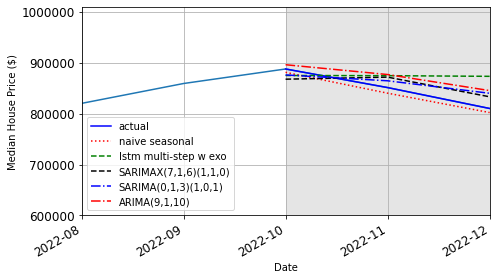

In [193]:
fig, ax = plt.subplots(figsize=(7, 4))
#plt.figure(figsize=(20, 20))
t_stats['Month'] = t_stats['Month'].astype(str)
t_stats['Month'] = pd.to_datetime(t_stats['Month'])
 
ax.plot(t_stats['Median Price'])
ax.plot(pred_df_Q4_PLOT['actual'], 'b-', label='actual')
ax.plot(pred_df_Q4_PLOT['pred_naive_seasonal'], 'r:', label='naive seasonal')
ax.plot(pred_df_Q4_PLOT['pred_lstm_mt'], 'g--', label='lstm multi-step w exo')
ax.plot(pred_df_Q4_PLOT['pred_SARIMAX_Q4'], 'k--', label='SARIMAX(7,1,6)(1,1,0)')
ax.plot(pred_df_Q4_PLOT['pred_SARIMA_Q4'], 'b-.', label='SARIMA(0,1,3)(1,0,1)')
ax.plot(pred_df_Q4_PLOT['pred_ARIMA_Q4'], 'r-.', label='ARIMA(9,1,10)')


ax.set_xlabel('Date')
ax.set_ylabel('Median House Price ($)')

ax.set_xticks(t_stats.index)
ax.set_xticklabels(t_stats['Month'].dt.strftime('%Y-%m'))
ax.axvspan(117, 119, color='#808080', alpha=0.2)
ax.set_xlim(115, 119)

ax.get_yaxis().get_major_formatter().set_scientific(False)
y_lower_limit = 600000  
ax.set_ylim(y_lower_limit, ax.get_ylim()[1])
ax.tick_params(axis='both', which='both', labelsize=12)

plt.grid(True)

legend = ax.legend(loc=0, prop={'size': 10})
fig.autofmt_xdate()
plt.tight_layout()
plt.show()
